In [1]:
from Genome.goldstandard_pair.lls import *
gd = '/home/hermuba/data0118/goldstandard/tf_intersect_GO_rm_plasmidGO.smpl'
net = '/home/hermuba/data0118/mutual_info/eskape_blastp_out_max_evalue_pivot_new_ordinary40_mutual' #ID has problem

In [2]:
gold = read_gold(gd)
all_chunks = read_net_by_chunk(net)
all_chunk = merge_net_with_all_chunks(gold,all_chunks)

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


In [3]:
all_chunk.head()

,gene_one,gene_two,goldstandard,mutual_info,nrm_mutual
0,562.22861.con.0021_43|562.22861,562.23232.con.0013_79|562.23232,0,0.064971,0.082309
1,562.22861.con.0021_43|562.22861,FLWH01000001_238|562.12962,0,0.031358,0.043472
2,562.23090.con.0007_144|562.23090,562.23416.con.0004_225|562.23416,0,0.123868,0.144118
3,562.23090.con.0007_144|562.23090,FLWH01000009_204|562.12962,0,0.079505,0.105643
4,562.23429.con.0026_46|562.23429,562.23494.con.0127_1|562.23494,0,0.017106,0.035671


In [4]:
all_chunk.shape

(99986, 5)

In [3]:
#import pandas as pd
#all_chunk = pd.read_csv('~/data0118/goldstandard/GO_smpl/eskape_GO_smpl')

In [5]:
%matplotlib inline
def wrap_for_diff_score(score, all_chunk):
    lls_score = lls_for_other(all_chunk, score)
    true_thres, slope, intercept = lls_regress_thres(lls_score)
    new_lls = map_lls(lls_score, true_thres, slope, intercept)
    all_chunk = map_score_to_lls(all_chunk, new_lls, score)
    tradeoff = try_diff_lls_thres(all_chunk)
    return(new_lls, all_chunk,lls_score, tradeoff, true_thres)

In [14]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score('mutual_info', all_chunk)

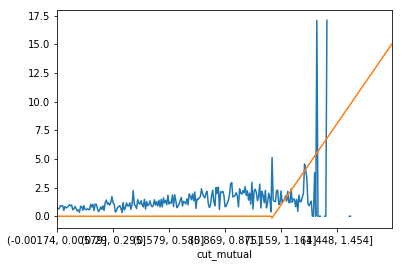

In [15]:
lls_score.plot()
new_lls.plot() # bin = 300

Text(0, 0.5, 'PPV')

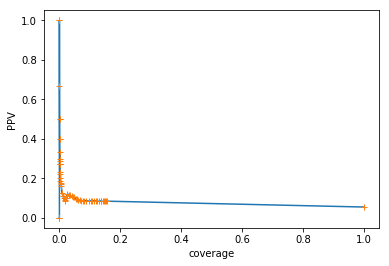

In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '-') 
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '+') 
plt.xlabel('coverage')
plt.ylabel('PPV') # bin = 200 # final version

In [9]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score('nrm_mutual', all_chunk)

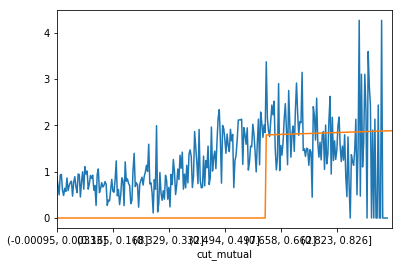

In [10]:
lls_score.plot()
new_lls.plot() 

In [18]:
# tradeoff bin = 300
tradeoff.to_csv('~/data0118/PPV_coverage/eskape_rm_plasmid_mutual_info')

Text(0, 0.5, 'PPV')

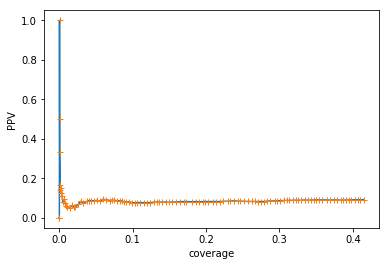

In [11]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '-') 
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '+') 
plt.xlabel('coverage')
plt.ylabel('PPV') # bin = 200

In [17]:
output = '/home/hermuba/data0118/network1122/eskape_lls_rm_plasmid_edgelist'
# map LLS_reg back to each "whole" network
map_lls_to_whole_data(net, new_lls, 'mutual_info', true_thres, output, 'eskape') # use mutual info

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  all_df['lls'] = all_df[score].map(new_lls)
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(359, 5)
15.172044178455497
(137, 5)
(422, 5)
15.172044178455497
(171, 5)
(414, 5)
15.172044178455497
(161, 5)
(387, 5)
15.172044178455497
(152, 5)
(343, 5)
15.172044178455497
(137, 5)
(359, 5)
15.172044178455497
(131, 5)
(394, 5)
15.172044178455497
(154, 5)
(358, 5)
15.172044178455497
(135, 5)
(390, 5)
15.172044178455497
(164, 5)
(358, 5)
15.172044178455497
(138, 5)
(383, 5)
15.172044178455497
(162, 5)
(374, 5)
15.172044178455497
(128, 5)
(380, 5)
15.172044178455497
(135, 5)
(388, 5)
15.172044178455497
(153, 5)
(405, 5)
15.172044178455497
(168, 5)
(536, 5)
15.172044178455497
(178, 5)
(1233, 5)
15.172044178455497
(275, 5)
(1335, 5)
15.172044178455497
(311, 5)
(1333, 5)
15.172044178455497
(272, 5)
(1283, 5)
15.172044178455497
(260, 5)
(1159, 5)
15.172044178455497
(243, 5)
(1130, 5)
15.172044178455497
(234, 5)
(1190, 5)
15.172044178455497
(247, 5)
(1287, 5)
15.172044178455497
(287, 5)
(1113, 5)
15.172044178455497
(223, 5)
(1204, 5)
15.172044178455497
(265, 5)
(1222, 5)
15.172044178455497

(683, 5)
15.172044178455497
(146, 5)
(720, 5)
15.172044178455497
(144, 5)
(684, 5)
15.172044178455497
(152, 5)
(785, 5)
15.172044178455497
(188, 5)
(695, 5)
15.172044178455497
(148, 5)
(740, 5)
15.172044178455497
(151, 5)
(737, 5)
15.172044178455497
(159, 5)
(711, 5)
15.172044178455497
(129, 5)
(739, 5)
15.172044178455497
(149, 5)
(752, 5)
15.172044178455497
(152, 5)
(850, 5)
15.172044178455497
(196, 5)
(271, 5)
15.172044178455497
(68, 5)
(193, 5)
15.172044178455497
(61, 5)
(194, 5)
15.172044178455497
(64, 5)
(188, 5)
15.172044178455497
(51, 5)
(157, 5)
15.172044178455497
(54, 5)
(169, 5)
15.172044178455497
(31, 5)
(174, 5)
15.172044178455497
(44, 5)
(176, 5)
15.172044178455497
(61, 5)
(170, 5)
15.172044178455497
(51, 5)
(164, 5)
15.172044178455497
(43, 5)
(186, 5)
15.172044178455497
(54, 5)
(156, 5)
15.172044178455497
(46, 5)
(187, 5)
15.172044178455497
(44, 5)
(181, 5)
15.172044178455497
(54, 5)
(184, 5)
15.172044178455497
(65, 5)
(453, 5)
15.172044178455497
(137, 5)
(985, 5)
15.1720

(252, 5)
15.172044178455497
(10, 5)
(206, 5)
15.172044178455497
(9, 5)
(99, 5)
15.172044178455497
(0, 5)
(103, 5)
15.172044178455497
(0, 5)
(97, 5)
15.172044178455497
(1, 5)
(78, 5)
15.172044178455497
(0, 5)
(80, 5)
15.172044178455497
(1, 5)
(97, 5)
15.172044178455497
(0, 5)
(82, 5)
15.172044178455497
(0, 5)
(96, 5)
15.172044178455497
(0, 5)
(83, 5)
15.172044178455497
(0, 5)
(87, 5)
15.172044178455497
(0, 5)
(83, 5)
15.172044178455497
(0, 5)
(92, 5)
15.172044178455497
(0, 5)
(94, 5)
15.172044178455497
(1, 5)
(92, 5)
15.172044178455497
(0, 5)
(208, 5)
15.172044178455497
(22, 5)
(603, 5)
15.172044178455497
(119, 5)
(628, 5)
15.172044178455497
(111, 5)
(574, 5)
15.172044178455497
(94, 5)
(518, 5)
15.172044178455497
(98, 5)
(518, 5)
15.172044178455497
(108, 5)
(603, 5)
15.172044178455497
(107, 5)
(517, 5)
15.172044178455497
(91, 5)
(569, 5)
15.172044178455497
(109, 5)
(519, 5)
15.172044178455497
(103, 5)
(601, 5)
15.172044178455497
(110, 5)
(522, 5)
15.172044178455497
(86, 5)
(517, 5)
15.1

(1112, 5)
15.172044178455497
(330, 5)
(1005, 5)
15.172044178455497
(190, 5)
(1014, 5)
15.172044178455497
(163, 5)
(990, 5)
15.172044178455497
(148, 5)
(833, 5)
15.172044178455497
(133, 5)
(884, 5)
15.172044178455497
(119, 5)
(955, 5)
15.172044178455497
(147, 5)
(887, 5)
15.172044178455497
(137, 5)
(936, 5)
15.172044178455497
(153, 5)
(911, 5)
15.172044178455497
(137, 5)
(959, 5)
15.172044178455497
(146, 5)
(832, 5)
15.172044178455497
(122, 5)
(940, 5)
15.172044178455497
(126, 5)
(952, 5)
15.172044178455497
(154, 5)
(947, 5)
15.172044178455497
(145, 5)
(1110, 5)
15.172044178455497
(314, 5)
(1377, 5)
15.172044178455497
(537, 5)
(1204, 5)
15.172044178455497
(429, 5)
(1227, 5)
15.172044178455497
(467, 5)
(1179, 5)
15.172044178455497
(457, 5)
(1169, 5)
15.172044178455497
(464, 5)
(1110, 5)
15.172044178455497
(418, 5)
(1294, 5)
15.172044178455497
(520, 5)
(1162, 5)
15.172044178455497
(429, 5)
(1229, 5)
15.172044178455497
(478, 5)
(1198, 5)
15.172044178455497
(454, 5)
(1185, 5)
15.17204417845

(1251, 5)
15.172044178455497
(198, 5)
(1290, 5)
15.172044178455497
(231, 5)
(1237, 5)
15.172044178455497
(214, 5)
(1364, 5)
15.172044178455497
(263, 5)
(1273, 5)
15.172044178455497
(224, 5)
(1266, 5)
15.172044178455497
(217, 5)
(1319, 5)
15.172044178455497
(215, 5)
(1299, 5)
15.172044178455497
(226, 5)
(1209, 5)
15.172044178455497
(215, 5)
(1364, 5)
15.172044178455497
(236, 5)
(1403, 5)
15.172044178455497
(263, 5)
(352, 5)
15.172044178455497
(42, 5)
(311, 5)
15.172044178455497
(39, 5)
(326, 5)
15.172044178455497
(33, 5)
(314, 5)
15.172044178455497
(32, 5)
(324, 5)
15.172044178455497
(36, 5)
(297, 5)
15.172044178455497
(33, 5)
(353, 5)
15.172044178455497
(45, 5)
(318, 5)
15.172044178455497
(39, 5)
(316, 5)
15.172044178455497
(37, 5)
(313, 5)
15.172044178455497
(30, 5)
(295, 5)
15.172044178455497
(25, 5)
(315, 5)
15.172044178455497
(33, 5)
(315, 5)
15.172044178455497
(28, 5)
(375, 5)
15.172044178455497
(48, 5)
(414, 5)
15.172044178455497
(99, 5)
(449, 5)
15.172044178455497
(129, 5)
(425,

15.172044178455497
(70, 5)
(328, 5)
15.172044178455497
(64, 5)
(293, 5)
15.172044178455497
(68, 5)
(289, 5)
15.172044178455497
(54, 5)
(308, 5)
15.172044178455497
(61, 5)
(326, 5)
15.172044178455497
(78, 5)
(288, 5)
15.172044178455497
(49, 5)
(314, 5)
15.172044178455497
(64, 5)
(323, 5)
15.172044178455497
(65, 5)
(301, 5)
15.172044178455497
(57, 5)
(317, 5)
15.172044178455497
(55, 5)
(328, 5)
15.172044178455497
(70, 5)
(321, 5)
15.172044178455497
(63, 5)
(472, 5)
15.172044178455497
(105, 5)
(524, 5)
15.172044178455497
(125, 5)
(556, 5)
15.172044178455497
(130, 5)
(479, 5)
15.172044178455497
(131, 5)
(494, 5)
15.172044178455497
(109, 5)
(506, 5)
15.172044178455497
(107, 5)
(557, 5)
15.172044178455497
(154, 5)
(499, 5)
15.172044178455497
(117, 5)
(518, 5)
15.172044178455497
(125, 5)
(528, 5)
15.172044178455497
(112, 5)
(490, 5)
15.172044178455497
(92, 5)
(509, 5)
15.172044178455497
(111, 5)
(514, 5)
15.172044178455497
(114, 5)
(555, 5)
15.172044178455497
(136, 5)
(736, 5)
15.172044178455

(1014, 5)
15.172044178455497
(191, 5)
(1122, 5)
15.172044178455497
(225, 5)
(979, 5)
15.172044178455497
(210, 5)
(1103, 5)
15.172044178455497
(246, 5)
(993, 5)
15.172044178455497
(213, 5)
(1100, 5)
15.172044178455497
(230, 5)
(973, 5)
15.172044178455497
(173, 5)
(1067, 5)
15.172044178455497
(216, 5)
(1090, 5)
15.172044178455497
(237, 5)
(1094, 5)
15.172044178455497
(216, 5)
(993, 5)
15.172044178455497
(237, 5)
(474, 5)
15.172044178455497
(113, 5)
(504, 5)
15.172044178455497
(118, 5)
(465, 5)
15.172044178455497
(113, 5)
(486, 5)
15.172044178455497
(116, 5)
(457, 5)
15.172044178455497
(106, 5)
(526, 5)
15.172044178455497
(134, 5)
(463, 5)
15.172044178455497
(123, 5)
(490, 5)
15.172044178455497
(110, 5)
(519, 5)
15.172044178455497
(111, 5)
(456, 5)
15.172044178455497
(102, 5)
(492, 5)
15.172044178455497
(122, 5)
(489, 5)
15.172044178455497
(109, 5)
(574, 5)
15.172044178455497
(146, 5)
(907, 5)
15.172044178455497
(293, 5)
(1122, 5)
15.172044178455497
(331, 5)
(911, 5)
15.172044178455497
(2

(688, 5)
15.172044178455497
(194, 5)
(708, 5)
15.172044178455497
(209, 5)
(736, 5)
15.172044178455497
(202, 5)
(807, 5)
15.172044178455497
(234, 5)
(669, 5)
15.172044178455497
(203, 5)
(732, 5)
15.172044178455497
(195, 5)
(751, 5)
15.172044178455497
(223, 5)
(776, 5)
15.172044178455497
(231, 5)
(749, 5)
15.172044178455497
(219, 5)
(744, 5)
15.172044178455497
(206, 5)
(784, 5)
15.172044178455497
(249, 5)
(743, 5)
15.172044178455497
(197, 5)
(811, 5)
15.172044178455497
(197, 5)
(795, 5)
15.172044178455497
(242, 5)
(793, 5)
15.172044178455497
(238, 5)
(962, 5)
15.172044178455497
(262, 5)
(1436, 5)
15.172044178455497
(413, 5)
(1208, 5)
15.172044178455497
(378, 5)
(1274, 5)
15.172044178455497
(366, 5)
(1373, 5)
15.172044178455497
(407, 5)
(1288, 5)
15.172044178455497
(394, 5)
(1348, 5)
15.172044178455497
(411, 5)
(1326, 5)
15.172044178455497
(404, 5)
(1378, 5)
15.172044178455497
(454, 5)
(1251, 5)
15.172044178455497
(351, 5)
(1356, 5)
15.172044178455497
(400, 5)
(1417, 5)
15.172044178455497

(657, 5)
15.172044178455497
(122, 5)
(778, 5)
15.172044178455497
(165, 5)
(718, 5)
15.172044178455497
(127, 5)
(710, 5)
15.172044178455497
(141, 5)
(728, 5)
15.172044178455497
(137, 5)
(678, 5)
15.172044178455497
(108, 5)
(714, 5)
15.172044178455497
(134, 5)
(711, 5)
15.172044178455497
(125, 5)
(857, 5)
15.172044178455497
(168, 5)
(892, 5)
15.172044178455497
(211, 5)
(913, 5)
15.172044178455497
(244, 5)
(908, 5)
15.172044178455497
(219, 5)
(979, 5)
15.172044178455497
(251, 5)
(912, 5)
15.172044178455497
(227, 5)
(988, 5)
15.172044178455497
(260, 5)
(924, 5)
15.172044178455497
(249, 5)
(959, 5)
15.172044178455497
(251, 5)
(963, 5)
15.172044178455497
(211, 5)
(924, 5)
15.172044178455497
(224, 5)
(947, 5)
15.172044178455497
(242, 5)
(1016, 5)
15.172044178455497
(254, 5)
(998, 5)
15.172044178455497
(251, 5)
(841, 5)
15.172044178455497
(90, 5)
(737, 5)
15.172044178455497
(102, 5)
(728, 5)
15.172044178455497
(58, 5)
(786, 5)
15.172044178455497
(89, 5)
(834, 5)
15.172044178455497
(119, 5)
(76

(619, 5)
15.172044178455497
(154, 5)
(688, 5)
15.172044178455497
(183, 5)
(636, 5)
15.172044178455497
(146, 5)
(640, 5)
15.172044178455497
(141, 5)
(671, 5)
15.172044178455497
(162, 5)
(665, 5)
15.172044178455497
(141, 5)
(630, 5)
15.172044178455497
(135, 5)
(680, 5)
15.172044178455497
(174, 5)
(725, 5)
15.172044178455497
(180, 5)
(843, 5)
15.172044178455497
(152, 5)
(755, 5)
15.172044178455497
(110, 5)
(870, 5)
15.172044178455497
(138, 5)
(779, 5)
15.172044178455497
(136, 5)
(866, 5)
15.172044178455497
(144, 5)
(817, 5)
15.172044178455497
(155, 5)
(823, 5)
15.172044178455497
(135, 5)
(849, 5)
15.172044178455497
(119, 5)
(835, 5)
15.172044178455497
(124, 5)
(752, 5)
15.172044178455497
(131, 5)
(882, 5)
15.172044178455497
(131, 5)
(964, 5)
15.172044178455497
(159, 5)
(1135, 5)
15.172044178455497
(208, 5)
(1121, 5)
15.172044178455497
(216, 5)
(1155, 5)
15.172044178455497
(221, 5)
(1061, 5)
15.172044178455497
(209, 5)
(1254, 5)
15.172044178455497
(282, 5)
(1136, 5)
15.172044178455497
(220

(1001, 5)
15.172044178455497
(250, 5)
(1092, 5)
15.172044178455497
(238, 5)
(1182, 5)
15.172044178455497
(222, 5)
(1191, 5)
15.172044178455497
(207, 5)
(1145, 5)
15.172044178455497
(215, 5)
(1266, 5)
15.172044178455497
(252, 5)
(1178, 5)
15.172044178455497
(229, 5)
(1219, 5)
15.172044178455497
(228, 5)
(1206, 5)
15.172044178455497
(225, 5)
(1221, 5)
15.172044178455497
(195, 5)
(1179, 5)
15.172044178455497
(203, 5)
(1216, 5)
15.172044178455497
(224, 5)
(1402, 5)
15.172044178455497
(261, 5)
(940, 5)
15.172044178455497
(240, 5)
(948, 5)
15.172044178455497
(230, 5)
(1022, 5)
15.172044178455497
(265, 5)
(960, 5)
15.172044178455497
(240, 5)
(1026, 5)
15.172044178455497
(292, 5)
(964, 5)
15.172044178455497
(246, 5)
(1007, 5)
15.172044178455497
(261, 5)
(1033, 5)
15.172044178455497
(257, 5)
(1014, 5)
15.172044178455497
(228, 5)
(985, 5)
15.172044178455497
(257, 5)
(1059, 5)
15.172044178455497
(277, 5)
(996, 5)
15.172044178455497
(250, 5)
(489, 5)
15.172044178455497
(124, 5)
(488, 5)
15.1720441

(915, 5)
15.172044178455497
(248, 5)
(935, 5)
15.172044178455497
(251, 5)
(976, 5)
15.172044178455497
(275, 5)
(915, 5)
15.172044178455497
(230, 5)
(938, 5)
15.172044178455497
(246, 5)
(1007, 5)
15.172044178455497
(283, 5)
(1015, 5)
15.172044178455497
(291, 5)
(954, 5)
15.172044178455497
(306, 5)
(1010, 5)
15.172044178455497
(254, 5)
(1042, 5)
15.172044178455497
(309, 5)
(1013, 5)
15.172044178455497
(297, 5)
(1044, 5)
15.172044178455497
(326, 5)
(1012, 5)
15.172044178455497
(288, 5)
(1059, 5)
15.172044178455497
(337, 5)
(970, 5)
15.172044178455497
(250, 5)
(1072, 5)
15.172044178455497
(280, 5)
(1069, 5)
15.172044178455497
(323, 5)
(1065, 5)
15.172044178455497
(346, 5)
(929, 5)
15.172044178455497
(302, 5)
(622, 5)
15.172044178455497
(168, 5)
(676, 5)
15.172044178455497
(201, 5)
(632, 5)
15.172044178455497
(184, 5)
(682, 5)
15.172044178455497
(215, 5)
(627, 5)
15.172044178455497
(185, 5)
(671, 5)
15.172044178455497
(194, 5)
(680, 5)
15.172044178455497
(171, 5)
(638, 5)
15.172044178455497

(669, 5)
15.172044178455497
(195, 5)
(723, 5)
15.172044178455497
(232, 5)
(734, 5)
15.172044178455497
(249, 5)
(729, 5)
15.172044178455497
(199, 5)
(651, 5)
15.172044178455497
(152, 5)
(645, 5)
15.172044178455497
(168, 5)
(707, 5)
15.172044178455497
(223, 5)
(652, 5)
15.172044178455497
(162, 5)
(676, 5)
15.172044178455497
(184, 5)
(681, 5)
15.172044178455497
(188, 5)
(682, 5)
15.172044178455497
(145, 5)
(657, 5)
15.172044178455497
(169, 5)
(689, 5)
15.172044178455497
(174, 5)
(752, 5)
15.172044178455497
(215, 5)
(597, 5)
15.172044178455497
(139, 5)
(640, 5)
15.172044178455497
(146, 5)
(585, 5)
15.172044178455497
(135, 5)
(660, 5)
15.172044178455497
(166, 5)
(602, 5)
15.172044178455497
(135, 5)
(626, 5)
15.172044178455497
(151, 5)
(640, 5)
15.172044178455497
(144, 5)
(591, 5)
15.172044178455497
(120, 5)
(637, 5)
15.172044178455497
(153, 5)
(665, 5)
15.172044178455497
(172, 5)
(760, 5)
15.172044178455497
(182, 5)
(925, 5)
15.172044178455497
(247, 5)
(998, 5)
15.172044178455497
(244, 5)
(

(884, 5)
15.172044178455497
(172, 5)
(775, 5)
15.172044178455497
(171, 5)
(875, 5)
15.172044178455497
(170, 5)
(815, 5)
15.172044178455497
(163, 5)
(827, 5)
15.172044178455497
(158, 5)
(853, 5)
15.172044178455497
(166, 5)
(802, 5)
15.172044178455497
(130, 5)
(839, 5)
15.172044178455497
(167, 5)
(903, 5)
15.172044178455497
(179, 5)
(807, 5)
15.172044178455497
(158, 5)
(594, 5)
15.172044178455497
(29, 5)
(555, 5)
15.172044178455497
(36, 5)
(610, 5)
15.172044178455497
(32, 5)
(563, 5)
15.172044178455497
(25, 5)
(551, 5)
15.172044178455497
(28, 5)
(602, 5)
15.172044178455497
(27, 5)
(581, 5)
15.172044178455497
(24, 5)
(543, 5)
15.172044178455497
(26, 5)
(599, 5)
15.172044178455497
(32, 5)
(658, 5)
15.172044178455497
(30, 5)
(334, 5)
15.172044178455497
(98, 5)
(326, 5)
15.172044178455497
(109, 5)
(352, 5)
15.172044178455497
(114, 5)
(332, 5)
15.172044178455497
(112, 5)
(343, 5)
15.172044178455497
(119, 5)
(340, 5)
15.172044178455497
(110, 5)
(348, 5)
15.172044178455497
(96, 5)
(338, 5)
15.1

(732, 5)
15.172044178455497
(135, 5)
(721, 5)
15.172044178455497
(163, 5)
(760, 5)
15.172044178455497
(149, 5)
(863, 5)
15.172044178455497
(194, 5)
(962, 5)
15.172044178455497
(171, 5)
(882, 5)
15.172044178455497
(166, 5)
(998, 5)
15.172044178455497
(177, 5)
(929, 5)
15.172044178455497
(181, 5)
(959, 5)
15.172044178455497
(162, 5)
(956, 5)
15.172044178455497
(146, 5)
(933, 5)
15.172044178455497
(143, 5)
(1007, 5)
15.172044178455497
(168, 5)
(1034, 5)
15.172044178455497
(178, 5)
(964, 5)
15.172044178455497
(173, 5)
(781, 5)
15.172044178455497
(200, 5)
(884, 5)
15.172044178455497
(253, 5)
(770, 5)
15.172044178455497
(198, 5)
(802, 5)
15.172044178455497
(218, 5)
(831, 5)
15.172044178455497
(231, 5)
(786, 5)
15.172044178455497
(184, 5)
(795, 5)
15.172044178455497
(191, 5)
(839, 5)
15.172044178455497
(225, 5)
(862, 5)
15.172044178455497
(221, 5)
(924, 5)
15.172044178455497
(225, 5)
(951, 5)
15.172044178455497
(250, 5)
(1041, 5)
15.172044178455497
(276, 5)
(962, 5)
15.172044178455497
(234, 5

15.172044178455497
(246, 5)
(504, 5)
15.172044178455497
(165, 5)
(530, 5)
15.172044178455497
(208, 5)
(546, 5)
15.172044178455497
(234, 5)
(539, 5)
15.172044178455497
(230, 5)
(383, 5)
15.172044178455497
(150, 5)
(211, 5)
15.172044178455497
(11, 5)
(179, 5)
15.172044178455497
(12, 5)
(196, 5)
15.172044178455497
(7, 5)
(211, 5)
15.172044178455497
(15, 5)
(164, 5)
15.172044178455497
(11, 5)
(195, 5)
15.172044178455497
(13, 5)
(204, 5)
15.172044178455497
(11, 5)
(199, 5)
15.172044178455497
(13, 5)
(332, 5)
15.172044178455497
(83, 5)
(528, 5)
15.172044178455497
(189, 5)
(511, 5)
15.172044178455497
(190, 5)
(502, 5)
15.172044178455497
(182, 5)
(540, 5)
15.172044178455497
(209, 5)
(487, 5)
15.172044178455497
(138, 5)
(546, 5)
15.172044178455497
(189, 5)
(539, 5)
15.172044178455497
(196, 5)
(544, 5)
15.172044178455497
(203, 5)
(667, 5)
15.172044178455497
(230, 5)
(906, 5)
15.172044178455497
(276, 5)
(815, 5)
15.172044178455497
(220, 5)
(858, 5)
15.172044178455497
(262, 5)
(910, 5)
15.17204417

15.172044178455497
(238, 5)
(822, 5)
15.172044178455497
(178, 5)
(893, 5)
15.172044178455497
(219, 5)
(912, 5)
15.172044178455497
(199, 5)
(855, 5)
15.172044178455497
(184, 5)
(881, 5)
15.172044178455497
(188, 5)
(896, 5)
15.172044178455497
(199, 5)
(960, 5)
15.172044178455497
(237, 5)
(478, 5)
15.172044178455497
(97, 5)
(191, 5)
15.172044178455497
(52, 5)
(183, 5)
15.172044178455497
(41, 5)
(187, 5)
15.172044178455497
(41, 5)
(189, 5)
15.172044178455497
(52, 5)
(206, 5)
15.172044178455497
(40, 5)
(190, 5)
15.172044178455497
(34, 5)
(190, 5)
15.172044178455497
(50, 5)
(320, 5)
15.172044178455497
(70, 5)
(757, 5)
15.172044178455497
(148, 5)
(709, 5)
15.172044178455497
(130, 5)
(738, 5)
15.172044178455497
(150, 5)
(745, 5)
15.172044178455497
(135, 5)
(726, 5)
15.172044178455497
(114, 5)
(707, 5)
15.172044178455497
(134, 5)
(753, 5)
15.172044178455497
(139, 5)
(830, 5)
15.172044178455497
(152, 5)
(550, 5)
15.172044178455497
(169, 5)
(471, 5)
15.172044178455497
(134, 5)
(474, 5)
15.1720441

(701, 5)
15.172044178455497
(198, 5)
(759, 5)
15.172044178455497
(242, 5)
(794, 5)
15.172044178455497
(235, 5)
(713, 5)
15.172044178455497
(184, 5)
(806, 5)
15.172044178455497
(241, 5)
(760, 5)
15.172044178455497
(214, 5)
(760, 5)
15.172044178455497
(217, 5)
(817, 5)
15.172044178455497
(246, 5)
(824, 5)
15.172044178455497
(235, 5)
(830, 5)
15.172044178455497
(238, 5)
(782, 5)
15.172044178455497
(142, 5)
(801, 5)
15.172044178455497
(163, 5)
(813, 5)
15.172044178455497
(151, 5)
(826, 5)
15.172044178455497
(150, 5)
(808, 5)
15.172044178455497
(143, 5)
(813, 5)
15.172044178455497
(146, 5)
(860, 5)
15.172044178455497
(178, 5)
(586, 5)
15.172044178455497
(148, 5)
(336, 5)
15.172044178455497
(101, 5)
(341, 5)
15.172044178455497
(107, 5)
(361, 5)
15.172044178455497
(98, 5)
(339, 5)
15.172044178455497
(88, 5)
(324, 5)
15.172044178455497
(99, 5)
(365, 5)
15.172044178455497
(105, 5)
(380, 5)
15.172044178455497
(131, 5)
(1410, 5)
15.172044178455497
(377, 5)
(1434, 5)
15.172044178455497
(405, 5)
(1

15.172044178455497
(81, 5)
(582, 5)
15.172044178455497
(82, 5)
(556, 5)
15.172044178455497
(73, 5)
(548, 5)
15.172044178455497
(76, 5)
(587, 5)
15.172044178455497
(75, 5)
(607, 5)
15.172044178455497
(86, 5)
(579, 5)
15.172044178455497
(94, 5)
(581, 5)
15.172044178455497
(120, 5)
(591, 5)
15.172044178455497
(130, 5)
(566, 5)
15.172044178455497
(93, 5)
(548, 5)
15.172044178455497
(105, 5)
(600, 5)
15.172044178455497
(112, 5)
(629, 5)
15.172044178455497
(122, 5)
(613, 5)
15.172044178455497
(129, 5)
(622, 5)
15.172044178455497
(142, 5)
(638, 5)
15.172044178455497
(152, 5)
(595, 5)
15.172044178455497
(128, 5)
(632, 5)
15.172044178455497
(129, 5)
(636, 5)
15.172044178455497
(146, 5)
(720, 5)
15.172044178455497
(178, 5)
(641, 5)
15.172044178455497
(129, 5)
(625, 5)
15.172044178455497
(92, 5)
(664, 5)
15.172044178455497
(89, 5)
(601, 5)
15.172044178455497
(75, 5)
(634, 5)
15.172044178455497
(95, 5)
(626, 5)
15.172044178455497
(98, 5)
(743, 5)
15.172044178455497
(111, 5)
(377, 5)
15.17204417845

(543, 5)
15.172044178455497
(234, 5)
(525, 5)
15.172044178455497
(202, 5)
(591, 5)
15.172044178455497
(267, 5)
(1035, 5)
15.172044178455497
(166, 5)
(1388, 5)
15.172044178455497
(158, 5)
(1244, 5)
15.172044178455497
(119, 5)
(1280, 5)
15.172044178455497
(154, 5)
(1331, 5)
15.172044178455497
(150, 5)
(1462, 5)
15.172044178455497
(173, 5)
(1007, 5)
15.172044178455497
(225, 5)
(779, 5)
15.172044178455497
(288, 5)
(768, 5)
15.172044178455497
(241, 5)
(774, 5)
15.172044178455497
(273, 5)
(820, 5)
15.172044178455497
(295, 5)
(823, 5)
15.172044178455497
(304, 5)
(772, 5)
15.172044178455497
(236, 5)
(798, 5)
15.172044178455497
(182, 5)
(771, 5)
15.172044178455497
(145, 5)
(739, 5)
15.172044178455497
(145, 5)
(801, 5)
15.172044178455497
(167, 5)
(824, 5)
15.172044178455497
(194, 5)
(498, 5)
15.172044178455497
(140, 5)
(219, 5)
15.172044178455497
(102, 5)
(219, 5)
15.172044178455497
(85, 5)
(214, 5)
15.172044178455497
(89, 5)
(225, 5)
15.172044178455497
(103, 5)
(225, 5)
15.172044178455497
(103,

(546, 5)
15.172044178455497
(167, 5)
(556, 5)
15.172044178455497
(198, 5)
(548, 5)
15.172044178455497
(182, 5)
(638, 5)
15.172044178455497
(245, 5)
(675, 5)
15.172044178455497
(138, 5)
(645, 5)
15.172044178455497
(82, 5)
(656, 5)
15.172044178455497
(99, 5)
(670, 5)
15.172044178455497
(100, 5)
(747, 5)
15.172044178455497
(129, 5)
(694, 5)
15.172044178455497
(143, 5)
(678, 5)
15.172044178455497
(121, 5)
(682, 5)
15.172044178455497
(97, 5)
(694, 5)
15.172044178455497
(139, 5)
(725, 5)
15.172044178455497
(150, 5)
(701, 5)
15.172044178455497
(110, 5)
(647, 5)
15.172044178455497
(71, 5)
(642, 5)
15.172044178455497
(74, 5)
(663, 5)
15.172044178455497
(73, 5)
(692, 5)
15.172044178455497
(87, 5)
(503, 5)
15.172044178455497
(62, 5)
(332, 5)
15.172044178455497
(13, 5)
(342, 5)
15.172044178455497
(15, 5)
(360, 5)
15.172044178455497
(21, 5)
(374, 5)
15.172044178455497
(18, 5)
(423, 5)
15.172044178455497
(89, 5)
(499, 5)
15.172044178455497
(129, 5)
(472, 5)
15.172044178455497
(142, 5)
(506, 5)
15.17

(447, 5)
15.172044178455497
(85, 5)
(359, 5)
15.172044178455497
(72, 5)
(389, 5)
15.172044178455497
(69, 5)
(438, 5)
15.172044178455497
(94, 5)
(321, 5)
15.172044178455497
(21, 5)
(348, 5)
15.172044178455497
(21, 5)
(367, 5)
15.172044178455497
(31, 5)
(353, 5)
15.172044178455497
(23, 5)
(525, 5)
15.172044178455497
(78, 5)
(537, 5)
15.172044178455497
(76, 5)
(537, 5)
15.172044178455497
(74, 5)
(485, 5)
15.172044178455497
(97, 5)
(350, 5)
15.172044178455497
(127, 5)
(369, 5)
15.172044178455497
(143, 5)
(372, 5)
15.172044178455497
(144, 5)
(281, 5)
15.172044178455497
(77, 5)
(187, 5)
15.172044178455497
(27, 5)
(203, 5)
15.172044178455497
(31, 5)
(215, 5)
15.172044178455497
(37, 5)
(648, 5)
15.172044178455497
(74, 5)
(702, 5)
15.172044178455497
(98, 5)
(759, 5)
15.172044178455497
(115, 5)
(769, 5)
15.172044178455497
(123, 5)
(451, 5)
15.172044178455497
(130, 5)
(422, 5)
15.172044178455497
(140, 5)
(436, 5)
15.172044178455497
(143, 5)
(638, 5)
15.172044178455497
(154, 5)
(940, 5)
15.1720441

(996, 5)
15.172044178455497
(203, 5)
(1107, 5)
15.172044178455497
(238, 5)
(836, 5)
15.172044178455497
(240, 5)
(947, 5)
15.172044178455497
(326, 5)
(876, 5)
15.172044178455497
(165, 5)
(1051, 5)
15.172044178455497
(184, 5)
(436, 5)
15.172044178455497
(47, 5)
(497, 5)
15.172044178455497
(51, 5)
(1090, 5)
15.172044178455497
(303, 5)
(1000, 5)
15.172044178455497
(312, 5)
(822, 5)
15.172044178455497
(226, 5)
(900, 5)
15.172044178455497
(220, 5)
(1259, 5)
15.172044178455497
(214, 5)
(844, 5)
15.172044178455497
(134, 5)
(813, 5)
15.172044178455497
(114, 5)
(803, 5)
15.172044178455497
(242, 5)
(792, 5)
15.172044178455497
(243, 5)
(509, 5)
15.172044178455497
(76, 5)
(480, 5)
15.172044178455497
(67, 5)
(699, 5)
15.172044178455497
(41, 5)
(640, 5)
15.172044178455497
(151, 5)
(749, 5)
15.172044178455497
(201, 5)
(515, 5)
15.172044178455497
(141, 5)
(479, 5)
15.172044178455497
(116, 5)
(559, 5)
15.172044178455497
(90, 5)
(900, 5)
15.172044178455497
(170, 5)
(855, 5)
15.172044178455497
(190, 5)
(5